In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# plt.rc(usetex = True)
def poly_plot2(x_data,y_data,x0,x1,ax,c='b',deg=1):
    try:
        res=np.polyfit(x_data,y_data,deg=deg,cov=True)
    except:
        res=np.polyfit(x_data,y_data,deg=deg,cov=True)
    coeff=res[0]
    k_err=[]
    i2=0;
    for i in res[1]:
        k_err.append(np.sqrt(i[i2]))
        i2+=1
    

    
    y=[]
    x_arr=np.linspace(x0,x1,1000)
    n=len(coeff)-1
    for x in x_arr:
        y_buff=0;
        n_buff=n;
        for i in coeff:
            y_buff+=i*x**n_buff
            n_buff-=1
        y.append(y_buff)
    s='y='
    n=deg
    for k in coeff:
        s+='('+format(k,'.2e')+')'+f'$x^{n}$+'
        n-=1
        
    ax.plot(x_arr,y,c=c,label=s[:-1])
    return coeff,k_err


In [5]:
data=pd.read_csv("data.dat")
data.head()

,N,T
0,1,1986
1,2,1079
2,3,1094
3,4,967
4,5,963


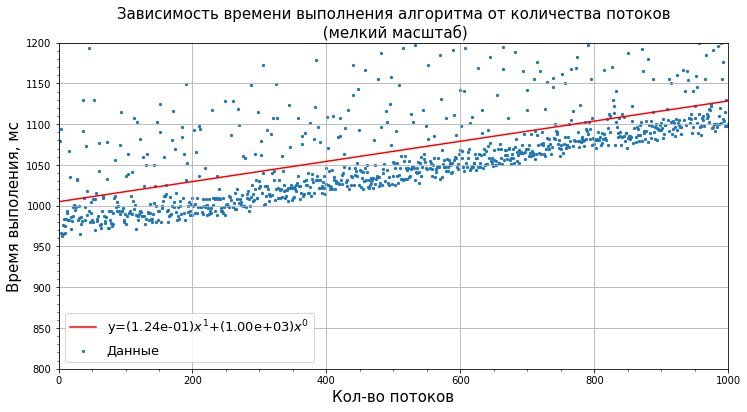

In [69]:
fig,ax=plt.subplots(figsize=(12,6))
data[data["T"]<2000].plot(ax=ax,kind="scatter",x="N",y="T",s=5,label="Данные")
plt.grid()
ax.minorticks_on()
plt.xlim(0,1000)
plt.ylim(800,1200)
poly_plot2(x_data=data["N"],y_data=data["T"],x0=0,x1=1000,ax=ax,c='r')
plt.title("Зависимость времени выполнения алгоритма от количества потоков\n (мелкий масштаб)",size=15)
plt.xlabel("Кол-во потоков",size=15)
plt.ylabel("Время выполения, мс",size=15)
plt.legend(fontsize=13)
fig.savefig("graph1.pdf")

([<matplotlib.axis.XTick at 0x1fd07325da0>,
 <a list of 11 Text xticklabel objects>)

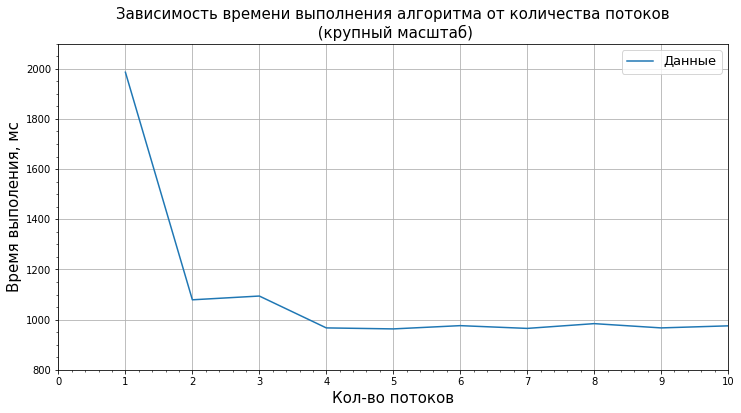

In [71]:
fig,ax=plt.subplots(figsize=(12,6))
data[data["T"]<2000].plot(ax=ax,kind="line",x="N",y="T",label="Данные")
plt.grid()
ax.minorticks_on()
plt.xlim(1,10)
plt.ylim(800,2100)
# poly_plot2(x_data=data["N"],y_data=data["T"],x0=0,x1=1000,ax=ax,c='r')
plt.title("Зависимость времени выполнения алгоритма от количества потоков\n (крупный масштаб)",size=15)
plt.xlabel("Кол-во потоков",size=15)
plt.ylabel("Время выполения, мс",size=15)
plt.legend(fontsize=13)
fig.savefig("graph2.pdf")
plt.xticks(np.linspace(0,10,11))